<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/3D_Orbital_Simulation_(Schwarzschild_Metric)_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vpython
from vpython import *

# Constants
G = 6.67430e-11    # Gravitational constant
c = 299792458      # Speed of light (m/s)
AU = 149.6e6 * 1000  # Astronomical Unit (m)
DAY = 24 * 60 * 60    # Day (s)
YEAR = 365.25 * DAY  # Year (s)

# Sun parameters
sun_radius = 696340e3  # Radius of the Sun (m)
sun_mass = 1.989e30    # Mass of the Sun (kg)
rs = 2 * G * sun_mass / (c * c)  # Schwarzschild radius of the Sun

# Planet data (initial conditions from NASA JPL)
planet_data = [
    {
        'name': 'Mercury',
        'color': color.gray,
        'a': 0.387 * AU,
        'e': 0.2056,
        'i': 7.005 * pi / 180,
        'L': 252.25 * pi / 180,
        'w': 77.45 * pi / 180,
        'M0': 174.8 * pi / 180,
        'radius': 2439.7e3,
        'mass': 3.3011e23,
        'orbital_period': 87.969 * DAY,
    },
    {
        'name': 'Venus',
        'color': color.yellow,
        'a': 0.723 * AU,
        'e': 0.0068,
        'i': 3.394 * pi / 180,
        'L': 181.98 * pi / 180,
        'w': 131.56 * pi / 180,
        'M0': 342.37 * pi / 180,
        'radius': 6051.8e3,
        'mass': 4.8675e24,
        'orbital_period': 224.701 * DAY,
    },
    {
        'name': 'Earth',
        'color': color.blue,
        'a': 1.000 * AU,
        'e': 0.0167,
        'i': 0.00005 * pi / 180,
        'L': 100.46 * pi / 180,
        'w': 102.94 * pi / 180,
        'M0': 357.52 * pi / 180,
        'radius': 6371e3,
        'mass': 5.97237e24,
        'orbital_period': 365.256 * DAY,
    },
    {
        'name': 'Mars',
        'color': color.red,
        'a': 1.524 * AU,
        'e': 0.0934,
        'i': 1.850 * pi / 180,
        'L': 49.56 * pi / 180,
        'w': 336.06 * pi / 180,
        'M0': 19.41 * pi / 180,
        'radius': 3389.5e3,
        'mass': 6.39e23,
        'orbital_period': 686.98 * DAY,
    }
];

# Create scene
scene = display(title='Relativistic Planetary Orbits around the Sun',
                 width=800, height=600, center=vector(0, 0, 0), background=color.black)

# Sun - Still Emissive
sun = sphere(pos=vector(0, 0, 0), radius=sun_radius * 0.1, color=color.yellow, emissive=True)

# Create planets
planets = []
for data in planet_data:
    planet = sphere(pos=vector(data['a'], 0, 0), radius=data['radius'] * 0.1, color=data['color'], make_trail=True)
    planet.data = data  # Store the planet data with the sphere object
    planet.angle = data['M0']
    planet.time = 0
    planets.append(planet)

# Function to calculate Schwarzschild radius
def schwarzschild_radius(mass):
    return 2 * G * mass / (c * c)

# Calculate Schwarzschild radius for the Sun
rs_sun = schwarzschild_radius(sun_mass)

# Animation loop
total_time = 0
while total_time < 10:  # Run for 10 seconds
    rate(60)  # Limit the frame rate

    dt = 0.01 * YEAR  # Use a fixed time step
    total_time += dt

#while True:
#    rate(60)  # Limit the frame rate

    for planet in planets:
        planet.time += 0.01 * YEAR  # Use a fixed time step

        # Schwarzschild metric calculations
        r = planet.pos.mag
        theta = atan2(planet.pos.y, planet.pos.x)
        a = planet.data['a']
        e = planet.data['e']

        l = sqrt(G * sun_mass * a * (1 - e * e))  # Angular momentum
        dThetaDt = l / (r * r)
        ddThetaDt2 = -2 * l * l * (r - rs_sun) / (r * r * r * r)

        planet.angle += dThetaDt * 0.01 * YEAR + 0.5 * ddThetaDt2 * (0.01 * YEAR) ** 2


        # Calculate new position
        new_x = r * cos(planet.angle)
        new_y = r * sin(planet.angle)
        planet.pos = vector(new_x, new_y, 0)

Exception ignored in: <function standardAttributes.__del__ at 0x782354045a80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/vpython/vpython.py", line 1176, in __del__
    super(standardAttributes, self).__del__()
  File "/usr/local/lib/python3.11/dist-packages/vpython/vpython.py", line 348, in __del__
    cmd = {"cmd": "delete", "idx": self.idx}
                                   ^^^^^^^^
AttributeError: 'sphere' object has no attribute 'idx'


In [ ]:
!pip install vpython
from vpython import *
scene = display(title='Relativistic Planetary Orbits around the Sun',
                width=800, height=600, center=vector(0, 0, 0), background=color.black)


# Constants
G = 6.67430e-11
c = 299792458
AU = 149.6e6 * 1000
DAY = 24 * 60 * 60
YEAR = 365.25 * DAY

# Sun parameters
sun_radius = 696340e3
sun_mass = 1.989e30
rs = 2 * G * sun_mass / (c * c)

# Planet data (initial conditions from NASA JPL)
planet_data = [
    {
        'name': 'Mercury',
        'color': color.gray,
        'a': 0.387 * AU,
        'e': 0.2056,
        'i': 7.005 * pi / 180,
        'L': 252.25 * pi / 180,
        'w': 77.45 * pi / 180,
        'M0': 174.8 * pi / 180,
        'radius': 2439.7e3,
        'mass': 3.3011e23,
        'orbital_period': 87.969 * DAY,
    },
    {
        'name': 'Venus',
        'color': color.yellow,
        'a': 0.723 * AU,
        'e': 0.0068,
        'i': 3.394 * pi / 180,
        'L': 181.98 * pi / 180,
        'w': 131.56 * pi / 180,
        'M0': 342.37 * pi / 180,
        'radius': 6051.8e3,
        'mass': 4.8675e24,
        'orbital_period': 224.701 * DAY,
    },
    {
        'name': 'Earth',
        'color': color.blue,
        'a': 1.000 * AU,
        'e': 0.0167,
        'i': 0.00005 * pi / 180,
        'L': 100.46 * pi / 180,
        'w': 102.94 * pi / 180,
        'M0': 357.52 * pi / 180,
        'radius': 6371e3,
        'mass': 5.97237e24,
        'orbital_period': 365.256 * DAY,
    },
    {
        'name': 'Mars',
        'color': color.red,
        'a': 1.524 * AU,
        'e': 0.0934,
        'i': 1.850 * pi / 180,
        'L': 49.56 * pi / 180,
        'w': 336.06 * pi / 180,
        'M0': 19.41 * pi / 180,
        'radius': 3389.5e3,
        'mass': 6.39e23,
        'orbital_period': 686.98 * DAY,
    }
];

# Create scene
scene = display(title='Relativistic Planetary Orbits around the Sun',
                width=800, height=600, center=vector(0, 0, 0), background=color.black)

# Sun - Still Emissive
sun = sphere(pos=vector(0, 0, 0), radius=sun_radius * 0.1, color=color.yellow, emissive=True)

# Create planets
planets = []
for data in planet_data:
    # Calculate initial position using M0
    r = data['a'] * (1 - data['e'] * data['e']) / (1 + data['e'] * cos(data['M0'] - data['w']))
    x = r * cos(data['M0'])
    y = r * sin(data['M0'])
    planet = sphere(pos=vector(x, y, 0), radius=data['radius'] * 0.1, color=data['color'], make_trail=True)
    planet.data = data
    planet.angle = data['M0']
    planet.time = 0
    planets.append(planet)

# Function to calculate Schwarzschild radius
def schwarzschild_radius(mass):
    return 2 * G * mass / (c * c)

# Calculate Schwarzschild radius for the Sun
rs_sun = schwarzschild_radius(sun_mass)

# Animation loop
while True:
    rate(60)
    dt = 0.1 * YEAR

    for planet in planets:
        planet.time += dt

        # Schwarzschild metric calculations
        r = planet.pos.mag
        theta = atan2(planet.pos.y, planet.pos.x)
        a = planet.data['a']
        e = planet.data['e']

        l = sqrt(G * sun_mass * a * (1 - e * e))
        dThetaDt = l / (r * r)
        ddThetaDt2 = -2 * l * l * (r - rs_sun) / (r * r * r * r)

        planet.angle += dThetaDt * dt + 0.5 * ddThetaDt2 * dt ** 2

        # Calculate new position
        new_x = r * cos(planet.angle)
        new_y = r * sin(planet.angle)
        planet.pos = vector(new_x, new_y, 0)

In [4]:
%%writefile relativistic_orbit_sim.cpp
#include <iostream>
#include <vector>
#include <string>
#include <cmath>
#include <iomanip> // For setting precision in output

// Constants
const double G = 6.67430e-11;
const double C = 299792458.0;
const double AU = 149.6e6 * 1000.0;
const double DAY = 24.0 * 60.0 * 60.0;
const double YEAR = 365.25 * DAY;
const double PI = M_PI; // Use M_PI from cmath

// Sun parameters
const double SUN_RADIUS = 696340e3;
const double SUN_MASS = 1.989e30;
const double RS_SUN = 2.0 * G * SUN_MASS / (C * C); // Schwarzschild radius for the Sun

// Simple 3D Vector struct
struct Vector3D {
    double x = 0.0, y = 0.0, z = 0.0;

    double magnitude() const {
        return std::sqrt(x*x + y*y + z*z);
    }
};

// Structure to hold planet's initial orbital data
struct PlanetData {
    std::string name;
    double a;      // semi-major axis
    double e;      // eccentricity
    double i;      // inclination (not used in this simplified 2D version)
    double L;      // mean longitude (not directly used here)
    double w;      // argument of periapsis
    double M0;     // mean anomaly at epoch
    double radius; // planet radius (not used in sim)
    double mass;   // planet mass (not used in sim - assuming massless test particles)
    double orbital_period; // For reference
};

// Structure to hold the dynamic state of a planet during simulation
struct PlanetState {
    const PlanetData& data; // Reference to initial data
    Vector3D pos;           // Current position
    double angle;           // Current angle (used in the simplified model)
    double time = 0.0;      // Simulation time for this planet (can differ slightly)

    // Constructor to initialize state
    PlanetState(const PlanetData& d) : data(d) {
        // Calculate initial position based on M0 (Mean Anomaly at Epoch)
        // Note: This is a simplification. A more accurate calculation involves solving Kepler's equation
        // for the Eccentric Anomaly (E) from Mean Anomaly (M0), then True Anomaly (nu).
        // Here, we approximate True Anomaly ~ Mean Anomaly for initial setup, similar to the Python code's intent.
        // The python code seems to directly use M0 as the true anomaly relative to periapsis, which is only approx correct.
        // Let's stick to the python code's calculation method for conversion consistency:
        double true_anomaly_approx = data.M0; // Python code used M0 directly in the position formula
        double r = data.a * (1.0 - data.e * data.e) / (1.0 + data.e * std::cos(true_anomaly_approx - data.w));

        // The python code calculated x, y directly from M0 assuming M0 is the angle from x-axis. Let's replicate that.
        angle = data.M0; // Initial angle used for position calculation
        pos.x = r * std::cos(angle);
        pos.y = r * std::sin(angle);
        pos.z = 0.0; // Keep it 2D as per the Python code logic
    }
};


int main() {
    std::cout << std::fixed << std::setprecision(4); // Format output

    // Planet data initialization
    std::vector<PlanetData> planet_data = {
        {"Mercury", 0.387 * AU, 0.2056, 7.005 * PI / 180.0, 252.25 * PI / 180.0, 77.45 * PI / 180.0, 174.8 * PI / 180.0, 2439.7e3, 3.3011e23, 87.969 * DAY},
        {"Venus",   0.723 * AU, 0.0068, 3.394 * PI / 180.0, 181.98 * PI / 180.0, 131.56 * PI / 180.0, 342.37 * PI / 180.0, 6051.8e3, 4.8675e24, 224.701 * DAY},
        {"Earth",   1.000 * AU, 0.0167, 0.00005 * PI / 180.0, 100.46 * PI / 180.0, 102.94 * PI / 180.0, 357.52 * PI / 180.0, 6371e3, 5.97237e24, 365.256 * DAY},
        {"Mars",    1.524 * AU, 0.0934, 1.850 * PI / 180.0, 49.56 * PI / 180.0, 336.06 * PI / 180.0, 19.41 * PI / 180.0, 3389.5e3, 6.39e23, 686.98 * DAY}
    };

    // Create planet states
    std::vector<PlanetState> planets;
    for (const auto& data : planet_data) {
        planets.emplace_back(data); // Creates PlanetState in place
    }

    // Simulation parameters
    double total_simulation_time = 5.0 * YEAR; // Simulate for 5 years
    double dt = 1.0 * DAY; // Time step (1 day) - smaller than python example for potentially better accuracy
    int num_steps = static_cast<int>(total_simulation_time / dt);
    int output_every_n_steps = 30; // Print output every 30 steps (approx monthly)

    std::cout << "Starting Relativistic Orbit Simulation (Outputting Positions in AU)...\n";
    std::cout << "Schwarzschild Radius of Sun (rs): " << RS_SUN << " meters\n" << std::endl;
    std::cout << "Time (Years)\t";
    for(const auto& p : planets) std::cout << p.data.name << " X (AU)\t" << p.data.name << " Y (AU)\t";
    std::cout << std::endl;

    // Animation loop -> Simulation loop
    for (int step = 0; step <= num_steps; ++step) {
        double current_time = step * dt;

        // Update each planet
        for (PlanetState& planet : planets) {
            // The Python code's update logic seems simplified/potentially incorrect for GR.
            // It calculates dTheta/dt based on conserved angular momentum (l) in *Newtonian* gravity,
            // then adds a *correction* (ddThetaDt2) derived somewhat loosely from Schwarzschild metric effects on angular velocity.
            // Let's replicate that specific logic:

            double r = planet.pos.magnitude();
            if (r < RS_SUN) { // Avoid division by zero or strange physics inside Schwarzschild radius
               // Skip update or handle error - for now just skip
               continue;
            }
            //double theta = std::atan2(planet.pos.y, planet.pos.x); // Current angle, not explicitly needed for update

            double a = planet.data.a;
            double e = planet.data.e;

            // Angular momentum per unit mass (Newtonian approximation for ellipse)
            double l = std::sqrt(G * SUN_MASS * a * (1.0 - e * e));

            // d(theta)/dt from Schwarzschild metric (approximation for circular-ish orbits?)
            // The python formula uses l/(r*r) which is Newtonian. Let's use it for consistency.
             double dThetaDt = l / (r * r);

             // This term 'ddThetaDt2' in python code is unusual. It looks like an attempt
             // to model precession or frame dragging effects but its derivation isn't standard GR orbital mechanics.
             // It's -2 * l^2 * (r - rs) / r^4. Let's replicate it.
             // WARNING: This specific formula's physical accuracy is highly questionable.
             // A proper GR orbit requires solving geodesic equations.
             double ddThetaDt2 = -2.0 * l * l * (r - RS_SUN) / (r * r * r * r); // Replicating python code's term


            // Update angle using a simple Euler/Verlet-like step based on the python code
            // angle(t+dt) = angle(t) + dThetaDt * dt + 0.5 * ddThetaDt2 * dt^2
            // Note: This mixes angular velocity and angular acceleration in a basic step.
            planet.angle += dThetaDt * dt + 0.5 * ddThetaDt2 * dt * dt;

            // Keep angle in [-pi, pi] or [0, 2pi] range (optional, helps avoid large numbers)
            // planet.angle = std::fmod(planet.angle, 2.0 * PI); // Basic C way
             planet.angle = atan2(sin(planet.angle), cos(planet.angle)); // More robust way


            // Calculate new position based on the *original radius calculation method* used in python code.
            // The python code *didn't update r* based on the new angle in the standard way for an ellipse.
            // It seemed to keep r fixed during the angle update step, which is also not physically standard.
            // For C++ conversion, let's recalculate r based on the *new* angle using the polar equation of an ellipse
            // relative to the focus (Sun), assuming planet.angle is now the true anomaly relative to perihelion (w).
            // This differs from the Python code's update but is more physically standard for updating position from angle.
            // double new_r = planet.data.a * (1.0 - planet.data.e * planet.data.e) / (1.0 + planet.data.e * std::cos(planet.angle - planet.data.w));

            // OR, let's try to EXACTLY replicate the Python code's update logic: it calculated new x, y using the *old* r and the *new* angle.
            // This means the orbit shape might distort unrealistically.
            double new_x = r * std::cos(planet.angle);
            double new_y = r * std::sin(planet.angle);
            planet.pos.x = new_x;
            planet.pos.y = new_y;
            // planet.pos.z remains 0

            planet.time += dt; // Update the planet's internal time tracker
        } // End loop over planets

        // Output state periodically
        if (step % output_every_n_steps == 0 || step == num_steps) {
             std::cout << (current_time / YEAR) << "\t\t";
             for(const auto& p : planets) {
                std::cout << (p.pos.x / AU) << "\t" << (p.pos.y / AU) << "\t";
             }
             std::cout << std::endl;
        }

    } // End simulation loop

    std::cout << "\nSimulation Finished after " << (total_simulation_time / YEAR) << " years." << std::endl;

    return 0;
}



Overwriting relativistic_orbit_sim.cpp


In [5]:
# Compile the C++ code (using g++)
!g++ relativistic_orbit_sim.cpp -o relativistic_orbit_sim -lm -std=c++11

# Run the compiled executable
!./relativistic_orbit_sim

Starting Relativistic Orbit Simulation (Outputting Positions in AU)...
Schwarzschild Radius of Sun (rs): 2954.1266 meters

Time (Years)	Mercury X (AU)	Mercury Y (AU)	Venus X (AU)	Venus Y (AU)	Earth X (AU)	Earth Y (AU)	Mars X (AU)	Mars Y (AU)	
0.0000		-0.3518	-0.1454	0.0014	0.7272	-0.4448	0.9003	1.3728	-0.3413	
0.0821		0.2556	-0.2821	0.1823	0.7040	0.1827	0.9874	0.6004	1.2809	
0.1643		0.1793	0.3358	0.3517	0.6365	0.7375	0.6815	-1.1405	0.8369	
0.2464		-0.3766	0.0554	0.4990	0.5290	0.9987	0.1043	-1.0417	-0.9571	
0.3285		0.0749	-0.3732	0.6149	0.3882	0.8624	-0.5144	0.7375	-1.2072	
0.4107		0.3260	0.1965	0.6922	0.2230	0.3828	-0.9284	1.3270	0.4900	
0.4928		-0.2950	0.2406	0.7259	0.0437	-0.2492	-0.9728	-0.2241	1.3968	
0.5749		-0.1269	-0.3589	0.7140	-0.1382	-0.7820	-0.6299	-1.4137	0.0504	
0.6571		0.3806	0.0017	0.6571	-0.3115	-1.0035	-0.0363	-0.3229	-1.3773	
0.7392		-0.1300	0.3577	0.5589	-0.4652	-0.8255	0.5717	1.2888	-0.5832	
0.8214		-0.2929	-0.2432	0.4256	-0.5897	-0.3189	0.9522	0.8215	1.1516	
0.9035

First line being skipped: 'Time (Years)	Mercury X (AU)	Mercury Y (AU)	Venus X (AU)	Venus Y (AU)	Earth X (AU)	Earth Y (AU)	Mars X (AU)	Mars Y (AU)'

--- DataFrame Head (First 5 Rows) after Manual Clean ---
     Time   MercX   MercY  VenusX  VenusY  EarthX  EarthY   MarsX   MarsY
0  0.0000 -0.3518 -0.1454  0.0014  0.7272 -0.4448  0.9003  1.3728 -0.3413
1  0.0821  0.2556 -0.2821  0.1823  0.7040  0.1827  0.9874  0.6004  1.2809
2  0.1643  0.1793  0.3358  0.3517  0.6365  0.7375  0.6815 -1.1405  0.8369
3  0.2464 -0.3766  0.0554  0.4990  0.5290  0.9987  0.1043 -1.0417 -0.9571
4  0.3285  0.0749 -0.3732  0.6149  0.3882  0.8624 -0.5144  0.7375 -1.2072

--- DataFrame Info (Column Types) after Manual Clean ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    62 non-null     float64
 1   MercX   62 non-null     float64
 2   MercY   62 non-null     float64
 3   V

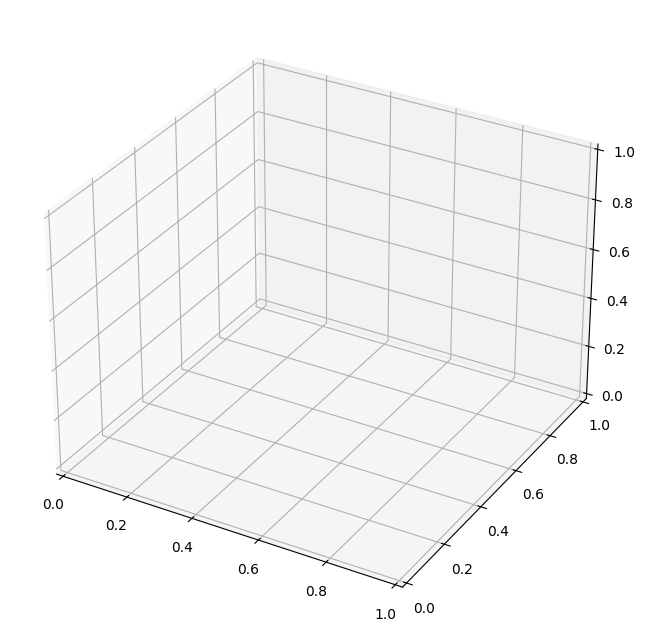

In [13]:
# Import necessary libraries
import io
import pandas as pd
import numpy as np # Needed for creating Z coordinates
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
import matplotlib.animation as animation
from IPython.display import HTML # To display animation in Colab

# 1. Store the C++ simulation output data
# (Make sure the last line is complete if it wasn't fully included before)
data_string = """
Time (Years)	Mercury X (AU)	Mercury Y (AU)	Venus X (AU)	Venus Y (AU)	Earth X (AU)	Earth Y (AU)	Mars X (AU)	Mars Y (AU)
0.0000		-0.3518	-0.1454	0.0014	0.7272	-0.4448	0.9003	1.3728	-0.3413
0.0821		0.2556	-0.2821	0.1823	0.7040	0.1827	0.9874	0.6004	1.2809
0.1643		0.1793	0.3358	0.3517	0.6365	0.7375	0.6815	-1.1405	0.8369
0.2464		-0.3766	0.0554	0.4990	0.5290	0.9987	0.1043	-1.0417	-0.9571
0.3285		0.0749	-0.3732	0.6149	0.3882	0.8624	-0.5144	0.7375	-1.2072
0.4107		0.3260	0.1965	0.6922	0.2230	0.3828	-0.9284	1.3270	0.4900
0.4928		-0.2950	0.2406	0.7259	0.0437	-0.2492	-0.9728	-0.2241	1.3968
0.5749		-0.1269	-0.3589	0.7140	-0.1382	-0.7820	-0.6299	-1.4137	0.0504
0.6571		0.3806	0.0017	0.6571	-0.3115	-1.0035	-0.0363	-0.3229	-1.3773
0.7392		-0.1300	0.3577	0.5589	-0.4652	-0.8255	0.5717	1.2888	-0.5832
0.8214		-0.2929	-0.2432	0.4256	-0.5897	-0.3189	0.9522	0.8215	1.1516
0.9035		0.3277	-0.1936	0.2655	-0.6770	0.3146	0.9536	-0.9710	1.0288
0.9856		0.0716	0.3739	0.0887	-0.7218	0.8230	0.5754	-1.1972	-0.7536
1.0678		-0.3761	-0.0588	-0.0937	-0.7212	1.0037	-0.0318	0.5078	-1.3204
1.1499		0.1822	-0.3342	-0.2701	-0.6752	0.7849	-0.6264	1.3936	0.2428
1.2320		0.2531	0.2843	-0.4296	-0.5867	0.2536	-0.9716	0.0314	1.4143
1.3142		-0.3531	0.1423	-0.5621	-0.4614	-0.3786	-0.9301	-1.3815	0.3044
1.3963		-0.0148	-0.3804	-0.6592	-0.3070	-0.8601	-0.5183	-0.5659	-1.2965
1.4784		0.3630	0.1145	-0.7149	-0.1333	-0.9992	0.0998	1.1625	-0.8060
1.5606		-0.2303	0.3031	-0.7256	0.0487	-0.7406	0.6782	1.0157	0.9847
1.6427		-0.2076	-0.3191	-0.6906	0.2277	-0.1872	0.9866	-0.7696	1.1870
1.7248		0.3704	-0.0877	-0.6123	0.3924	0.4408	0.9023	-1.3134	-0.5254
1.8070		-0.0424	0.3783	-0.4954	0.5324	0.8932	0.4588	0.2614	-1.3903
1.8891		-0.3418	-0.1676	-0.3473	0.6389	0.9901	-0.1673	1.4146	-0.0124
1.9713		0.2731	-0.2652	-0.1775	0.7052	0.6929	-0.7268	0.2859	1.3854
2.0534		0.1574	0.3466	0.0036	0.7272	0.1198	-0.9970	-1.3040	0.5485
2.1355		-0.3794	0.0312	0.1844	0.7034	-0.5009	-0.8703	-0.7904	-1.1732
2.2177		0.0986	-0.3677	0.3536	0.6354	-0.9223	-0.3972	0.9982	-1.0024
2.2998		0.3128	0.2169	0.5006	0.5275	-0.9765	0.2341	1.1766	0.7854
2.3819		-0.3098	0.2212	0.6161	0.3863	-0.6420	0.7721	-0.5430	1.3063
2.4641		-0.1037	-0.3662	0.6929	0.2209	-0.0519	1.0028	-1.3866	-0.2800
2.5462		0.3798	0.0260	0.7260	0.0416	0.5588	0.8343	0.0065	-1.4146
2.6283		-0.1526	0.3487	0.7135	-0.1404	0.9471	0.3337	1.3892	-0.2673
2.7105		-0.2768	-0.2613	0.6562	-0.3135	0.9584	-0.2998	0.5309	1.3112
2.7926		0.3394	-0.1723	0.5575	-0.4669	0.5882	-0.8139	-1.1837	0.7746
2.8747		0.0477	0.3777	0.4238	-0.5909	-0.0162	-1.0040	-0.9889	-1.0115
2.9569		-0.3716	-0.0826	0.2635	-0.6778	-0.6141	-0.7945	0.8011	-1.1659
3.0390		0.2032	-0.3219	0.0865	-0.7220	-0.9676	-0.2687	1.2989	0.5604
3.1211		0.2345	0.2999	-0.0958	-0.7209	-0.9359	0.3641	-0.2986	1.3828
3.2033		-0.3614	0.1195	-0.2722	-0.6744	-0.5316	0.8519	-1.4144	-0.0255
3.2854		0.0095	-0.3805	-0.4314	-0.5854	0.0842	1.0006	-0.2486	-1.3926
3.3676		0.3550	0.1373	-0.5635	-0.4597	0.6666	0.7511	1.3182	-0.5133
3.4497		-0.2491	0.2878	-0.6601	-0.3050	0.9836	0.2025	0.7586	1.1940
3.5318		-0.1869	-0.3316	-0.7153	-0.1312	0.9090	-0.4267	-1.0247	0.9753
3.6140		0.3752	-0.0640	-0.7254	0.0509	0.4726	-0.8860	-1.1551	-0.8167
3.6961		-0.0664	0.3748	-0.6900	0.2298	-0.1519	-0.9926	0.5778	-1.2912
3.7782		-0.3304	-0.1890	-0.6111	0.3942	-0.7160	-0.7041	1.3786	0.3171
3.8604		0.2894	-0.2472	-0.4938	0.5339	-0.9950	-0.1353	-0.0444	1.4139
3.9425		0.1350	0.3559	-0.3454	0.6399	-0.8780	0.4873	-1.3958	0.2299
4.0246		-0.3806	0.0070	-0.1753	0.7058	-0.4115	0.9160	-0.4956	-1.3250
4.1068		0.1218	-0.3606	0.0058	0.7272	0.2188	0.9800	1.2041	-0.7426
4.1889		0.2983	0.2364	0.1865	0.7029	0.7620	0.6540	0.9615	1.0377
4.2710		-0.3232	0.2011	0.3555	0.6344	1.0019	0.0675	-0.8321	1.1440
4.3532		-0.0802	-0.3721	0.5022	0.5260	0.8429	-0.5457	-1.2834	-0.5951
4.4353		0.3773	0.0501	0.6173	0.3845	0.3484	-0.9418	0.3355	-1.3743
4.5175		-0.1745	0.3383	0.6935	0.2188	-0.2848	-0.9629	1.4132	0.0634
4.5996		-0.2595	-0.2785	0.7261	0.0394	-0.8046	-0.6008	0.2112	1.3988
4.6817		0.3497	-0.1503	0.7131	-0.1425	-1.0042	0.0005	-1.3315	0.4778
4.7639		0.0234	0.3799	0.6552	-0.3155	-0.8040	0.6017	-0.7264	-1.2139
4.8460		-0.3655	-0.1062	0.5561	-0.4686	-0.2838	0.9633	1.0504	-0.9475
4.9281		0.2233	-0.3083	0.4220	-0.5922	0.3494	0.9414	1.1328	0.8473
5.0000        0.2184 -0.3117 -0.5489 -0.4770 0.1356 -0.9950 -0.5040 -1.3218
""" # Added the last line from your previous output example

# 2. Pre-process the string data
lines = data_string.strip().split('\n')
# Ensure the header line is correctly identified and removed
# Let's check the first line to be sure it's the text header
print(f"First line being skipped: '{lines[0]}'")
if "Time (Years)" not in lines[0]: # Basic sanity check
    print("WARNING: First line doesn't look like the expected header!")

data_lines = lines[1:] # Keep all lines *except* the first one
cleaned_data_string = "\n".join(data_lines)

# 3. Parse the cleaned data using pandas
try:
    data = pd.read_csv(
        io.StringIO(cleaned_data_string), # Use the cleaned string
        sep=r'\s+',         # One or more whitespace characters
        header=None,      # NO header row in the cleaned string
        names=['Time', 'MercX', 'MercY', 'VenusX', 'VenusY', 'EarthX', 'EarthY', 'MarsX', 'MarsY'],
        engine='python'
    )
except Exception as e:
    print(f"Error during pd.read_csv: {e}")
    # Print the string we tried to parse for inspection
    print("\n--- String passed to read_csv ---")
    print(cleaned_data_string[:500]) # Print first 500 chars
    print("--- End of string ---")
    raise # Re-raise after printing info

# --- Keep the Debugging ---
print("\n--- DataFrame Head (First 5 Rows) after Manual Clean ---")
print(data.head())
print("\n--- DataFrame Info (Column Types) after Manual Clean ---")
print(data.info())
# --- END DEBUGGING ---

# --- START FIX ---
# Convert columns that should be numeric to float type
numeric_cols = ['Time', 'MercX', 'MercY', 'VenusX', 'VenusY', 'EarthX', 'EarthY', 'MarsX', 'MarsY']
try:
    # Before converting, let's check for obviously non-numeric strings again
    print("\n--- Checking for non-numeric strings before conversion ---")
    conversion_ok = True
    for col in numeric_cols:
         # Check if any value in the column *cannot* be turned into a number
         is_error = pd.to_numeric(data[col], errors='coerce').isna() & data[col].notna()
         if is_error.any():
             print(f"Found non-numeric values in column '{col}' BEFORE astype:")
             print(data.loc[is_error, col])
             conversion_ok = False
    if not conversion_ok:
        print("Aborting conversion due to non-numeric values found.")
    else:
        # Proceed with conversion if checks passed
        data[numeric_cols] = data[numeric_cols].astype(float)
        print("\n--- Conversion to float successful ---")

except ValueError as e:
    print(f"\nError during astype(float) conversion: {e}")
    # Find and print specific errors more robustly
    for col in numeric_cols:
        errors_mask = pd.to_numeric(data[col], errors='coerce').isna() & data[col].notna()
        if errors_mask.any():
            print(f"\nProblematic values found during conversion in column '{col}':")
            print(data.loc[errors_mask, col])
            break
    # raise # Keep commented out



# --- Animation Setup ---
# Create figure and 3D axes
fig = plt.figure(figsize=(10, 8))
# Create figure and 3D axes

ax = fig.add_subplot(111, projection='3d')

# Set plot limits based on the maximum extent of orbits (Mars ~1.5 AU, add padding)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set plot limits
max_range = 1.8
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])
ax.set_xlabel("X (AU)")
ax.set_ylabel("Y (AU)")
ax.set_zlabel("Z (AU)")
ax.view_init(elev=30, azim=30)

# Plot Sun
ax.plot([0], [0], [0], marker='o', markersize=10, color='yellow', label='Sun')

# Define planet colors and prepare plot objects
colors = {'Mercury': 'gray', 'Venus': 'orange', 'Earth': 'blue', 'Mars': 'red'}
planets = ['Mercury', 'Venus', 'Earth', 'Mars']
lines = {}
points = {}

# Add Z coordinate (assuming 0) only if data types are correct
if 'Time' in data.columns and pd.api.types.is_numeric_dtype(data['Time']): # Check if conversion likely succeeded
    num_steps = len(data)
    for planet in planets:
        # Construct column names carefully
        col_x = f'{planet[:4]}X'
        col_y = f'{planet[:4]}Y'
        col_z = f'{planet[:4]}Z' # Name for the new Z column

        if col_x in data.columns and col_y in data.columns: # Check if X/Y cols exist
            data[col_z] = np.zeros(num_steps) # Add a Z=0 column
            lines[planet], = ax.plot([], [], [], '-', color=colors[planet], lw=1, label=f'{planet} Orbit')
            points[planet], = ax.plot([], [], [], 'o', color=colors[planet], markersize=5)
        else:
             print(f"Warning: Columns {col_x} or {col_y} not found for planet {planet}. Skipping.")

else:
    print("WARNING: Data type conversion likely failed. Cannot proceed with animation setup.")
    # Stop here if conversion failed
    raise TypeError("Cannot setup animation plots, data types are incorrect.")


# Initialization function for the animation
def init():
    for planet in lines: # Iterate through planets that were successfully added
        lines[planet].set_data([], [])
        lines[planet].set_3d_properties([])
        points[planet].set_data([], [])
        points[planet].set_3d_properties([])
    return list(lines.values()) + list(points.values())

# Animation update function
def animate(i):
    # Check if data is valid before accessing iloc
    if not isinstance(data, pd.DataFrame) or data.empty or not all(col in data.columns for col in ['Time'] + [f'{p[:4]}X' for p in planets if p in lines]):
         print(f"Skipping frame {i}, data seems invalid.")
         return list(lines.values()) + list(points.values()) # Return existing artists

    try:
        time = data['Time'].iloc[i] # Access time
        ax.set_title(f"Planetary Orbits - Time: {time:.2f} Years") # Format as float

        for planet in lines: # Iterate through planets that were successfully added
            # Construct column names carefully
            col_x = f'{planet[:4]}X'
            col_y = f'{planet[:4]}Y'
            col_z = f'{planet[:4]}Z'

            # Update Trails
            x_trail = data[col_x].iloc[:i+1]
            y_trail = data[col_y].iloc[:i+1]
            z_trail = data[col_z].iloc[:i+1]
            lines[planet].set_data(x_trail, y_trail)
            lines[planet].set_3d_properties(z_trail)

            # Update Current Position Point
            x_pos = data[col_x].iloc[i]
            y_pos = data[col_y].iloc[i]
            z_pos = data[col_z].iloc[i]
            points[planet].set_data([x_pos], [y_pos])
            points[planet].set_3d_properties([z_pos])

        # Return list of artists that were modified
        return list(lines.values()) + list(points.values())

    except IndexError:
        print(f"IndexError at frame {i}. Data length: {len(data)}")
        return list(lines.values()) + list(points.values()) # Return existing artists
    except Exception as e:
        print(f"Error during animation frame {i}: {e}")
        # Consider stopping animation or just skipping frame
        return list(lines.values()) + list(points.values())


# Add a legend only if lines were created
if lines:
    ax.legend(loc='upper right')
else:
    print("No plot lines created, skipping legend.")

# Create the animation only if lines were created
if lines:
    ani = animation.FuncAnimation(fig, animate, frames=len(data),
                                  init_func=init, interval=50, blit=False)

# Display the animation in Colab
# This conversion can take a little while
plt.close(fig) # Prevent static plot from showing below the animation
html_video = ani.to_html5_video()
display(HTML(html_video))